In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris # mengambil data iris dari pustaka scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1. Memuat Dataset Iris
iris = load_iris()
df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                  columns=iris['feature_names'] + ['target'])
df['class'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,class
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
 5   class              150 non-null    object 
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [6]:
# 2. Data Cleansing
df.duplicated().sum()

1

In [7]:
# drop duplicated data
df = df.drop_duplicates().reset_index(drop=True)
print(df.duplicated().sum())

0


In [8]:
# checking label class
df['class'].value_counts()

setosa        50
versicolor    50
virginica     49
Name: class, dtype: int64

In [9]:
# encode the class label
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df['class'].value_counts()

0    50
1    50
2    49
Name: class, dtype: int64

In [17]:
# 3. Exploratory Data Analysis (EDA)
print("Informasi Dataset:")
print(df.info())
print("\nStatistik Deskriptif:")
print(df.describe())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   target             149 non-null    float64
 5   class              149 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 7.1 KB
None

Statistik Deskriptif:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         149.000000        149.000000         149.000000   
mean            5.843624          3.059732           3.748993   
std             0.830851          0.436342           1.767791   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000 

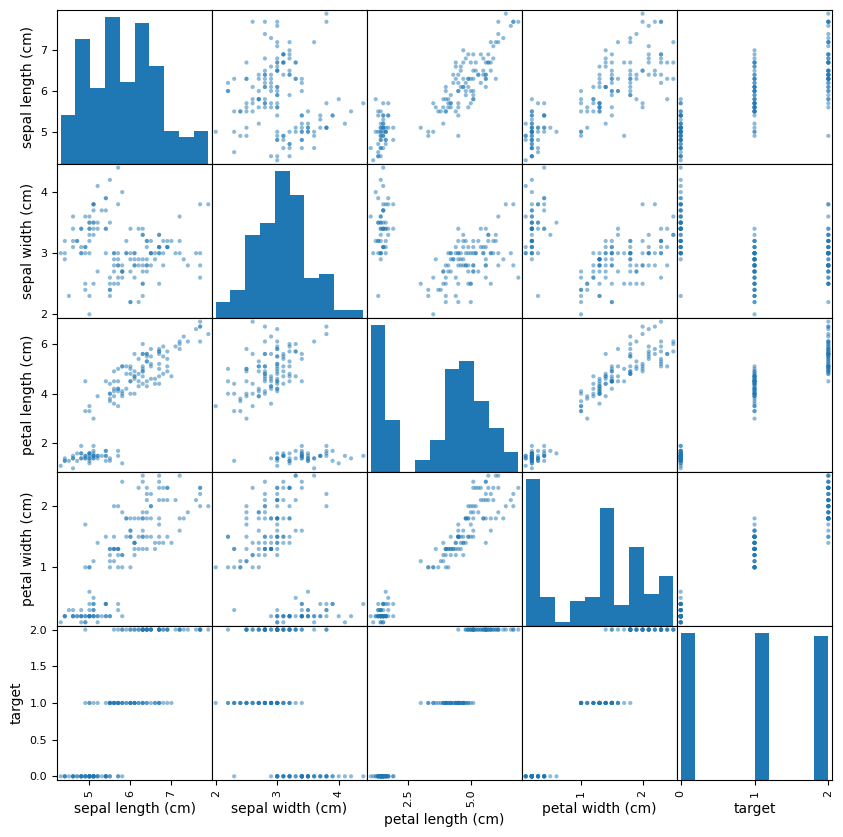

In [19]:
# Scatter Matrix
pd.plotting.scatter_matrix(df.drop(columns='class'), figsize=(10,10))
plt.show()

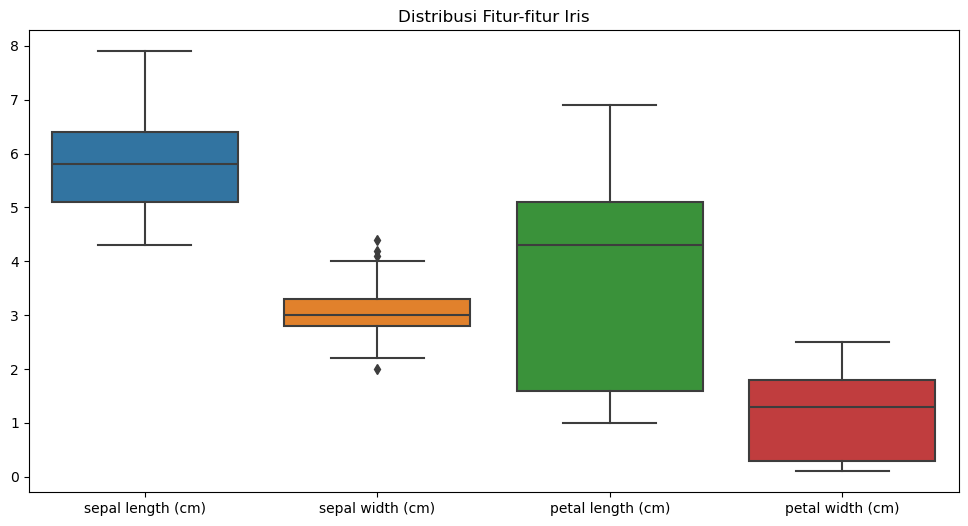

In [21]:
# Visualisasi distribusi fitur
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[iris['feature_names']])
plt.title('Distribusi Fitur-fitur Iris')
plt.show()

In [23]:
# 4. Preprocessing Data
X = df[iris['feature_names']]
y = df['target']

In [25]:
# Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Standardisasi fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# 5. Modelling
list_models = [('LR', LogisticRegression(solver = 'liblinear', multi_class='ovr')),
               ('CART', DecisionTreeClassifier()),
               ('KNN', KNeighborsClassifier()),
               ('LDA', LinearDiscriminantAnalysis()),
               ('NB', GaussianNB()),
               ('SVM', SVC(gamma='auto'))]

In [31]:
# Training Data dengan strategi K-Fold k=10
result = []
names = []
for name, model in list_models:
  kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
  cv_result = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  result.append(cv_result)
  names.append(name)
  print(f'{name}, average accuracy = {cv_result.mean():.4f} with std = {cv_result.std():.3f}')



LR, average accuracy = 0.8645 with std = 0.099
CART, average accuracy = 0.9227 with std = 0.085
KNN, average accuracy = 0.9136 with std = 0.081
LDA, average accuracy = 0.9709 with std = 0.063
NB, average accuracy = 0.9327 with std = 0.060
SVM, average accuracy = 0.9327 with std = 0.075


/var/folders/9m/vrsc0k6x5r9g1nlg5hgkp24c0000gn/T/ipykernel_66782/716515401.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result, labels=names)


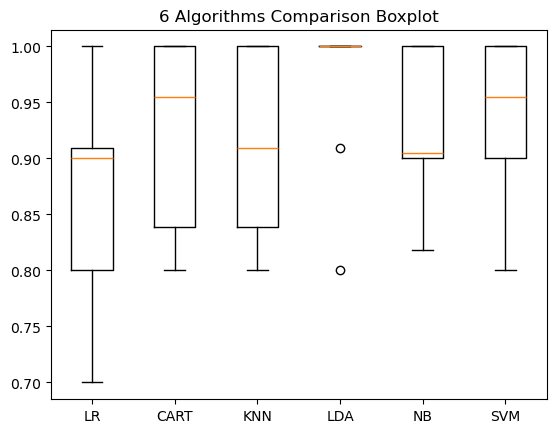

In [33]:
# 6. Evaluation
# Komparasi
plt.boxplot(result, labels=names)
plt.title('6 Algorithms Comparison Boxplot')
plt.show()

In [35]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

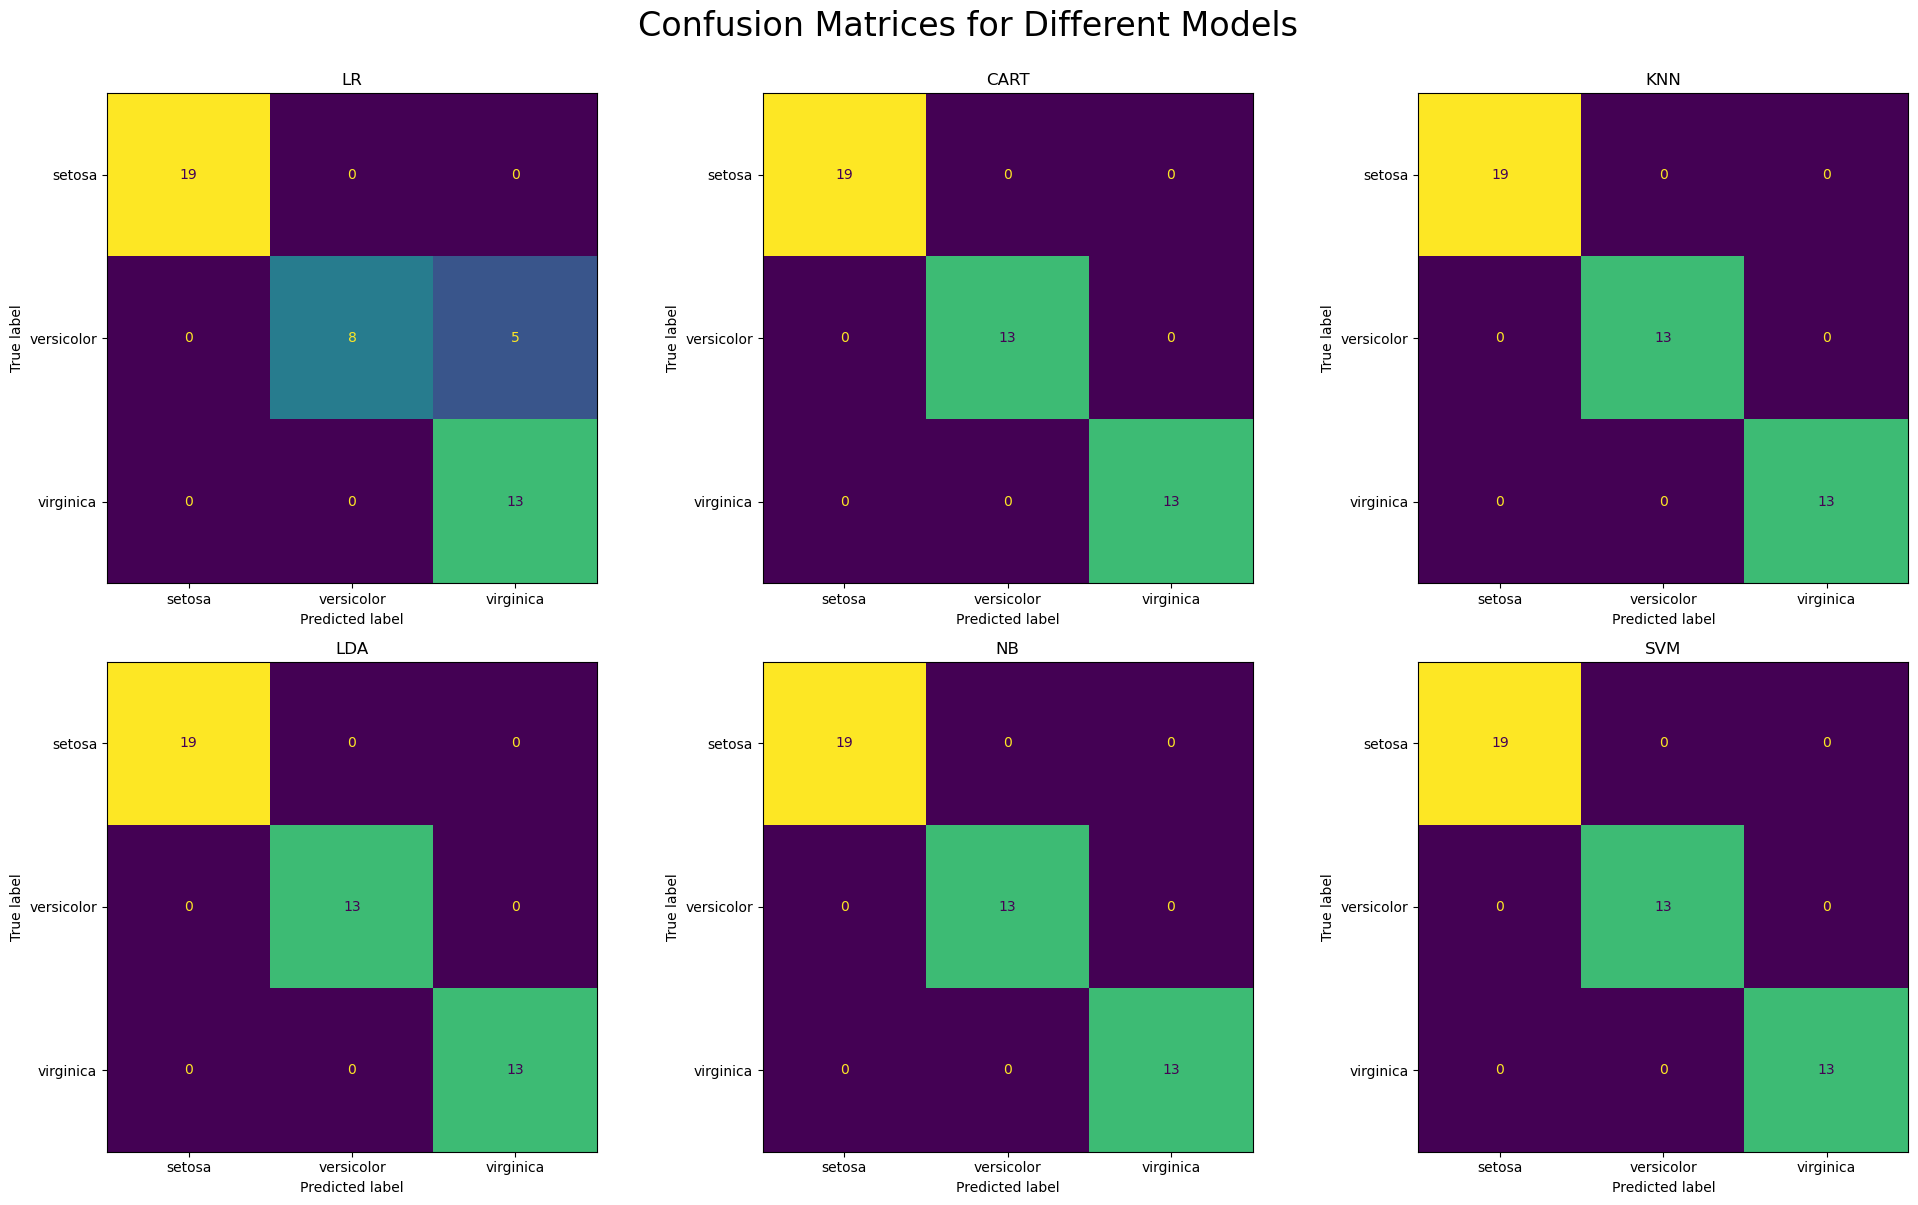

In [39]:

unique, counts = np.unique(y_test.to_numpy(), return_counts=True)
ulist = list(unique)
ulist.insert(0,'Model')

clist = list(counts)
clist.insert(0,'Actual')

sum_df = pd.DataFrame([clist], columns = ulist)


results = {'Model':[], 'Accuracy':[]}
detailed_metrics = []
labels = df['class'].unique()

fig, axs = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Confusion Matrices for Different Models', y=1, fontsize=24)
axs = axs.ravel()

# Fit dan evaluasi setiap model
for idx, (name, model) in enumerate(list_models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred, average=None)
    recall = metrics.recall_score(y_test, y_pred, average=None)
    f1 = metrics.f1_score(y_test, y_pred, average=None)

    for i, cls in enumerate(labels):
        detailed_metrics.append({
            "Model": name,
            "Class": f"{cls}",
            "Precision": precision[i],
            "Recall": recall[i],
            "F1-Score": f1[i]
        })
        
    results['Model'].append(name)
    results['Accuracy'].append(acc)

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(ax=axs[idx], colorbar=False)
    axs[idx].set_title(name)
    axs[idx].grid(False)  # Remove grid lines for cleaner look

    temp_unique, temp_counts = np.unique(y_pred, return_counts=True)
    temp_ulist = list(temp_unique)
    temp_ulist.insert(0,'Model')

    temp_clist = list(temp_counts)
    temp_clist.insert(0, name)

    temp_sum_df = pd.DataFrame([temp_clist], columns = temp_ulist)
    sum_df = pd.concat([sum_df, temp_sum_df], ignore_index=True)

plt.tight_layout()
plt.show()
sum_df.columns = ['Model','Setosa','Versicolor','Virginica']

In [41]:
# Tabel summary Prediksi
sum_df

,Model,Setosa,Versicolor,Virginica
0,Actual,19,13,13
1,LR,19,8,18
2,CART,19,13,13
3,KNN,19,13,13
4,LDA,19,13,13
5,NB,19,13,13
6,SVM,19,13,13


In [43]:

# Performance Comparison Table
acc_df = pd.DataFrame(results)
detailed_df = pd.DataFrame(detailed_metrics).round(4)
flat_df = detailed_df.pivot(index="Model", columns="Class", values=["Precision", "Recall", "F1-Score"])
flat_df.columns = [f"{metric}_{cls}" for metric, cls in flat_df.columns]
flat_df.reset_index(inplace=True)
result_df = pd.merge(acc_df, flat_df, on="Model")

result_df

,Model,Accuracy,Precision_0,Precision_1,Precision_2,Recall_0,Recall_1,Recall_2,F1-Score_0,F1-Score_1,F1-Score_2
0,LR,0.888889,1.0,1.0,0.7222,1.0,0.6154,1.0,1.0,0.7619,0.8387
1,CART,1.000000,1.0,1.0,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.0000
2,KNN,1.000000,1.0,1.0,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.0000
3,LDA,1.000000,1.0,1.0,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.0000
4,NB,1.000000,1.0,1.0,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.0000
5,SVM,1.000000,1.0,1.0,1.0000,1.0,1.0000,1.0,1.0,1.0000,1.0000
